In [80]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [81]:
df = pd.read_csv("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/matchingscores.csv")
df

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
0,0,IMG_20190323_114826.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,1,IMG_20190323_114836.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,2,IMG_20190323_114931.jpg,"[""zaal_14__IMG_20190323_114931__01.png""]",[227.0],"[""zaal_19__IMG_20190323_121411__10.png""]",[1397.0],[0.05762862499997823],"[""zaal_14__IMG_20190323_114931__01.png""]",[142.0],"[""Zaal_D__20190323_114017__01.png""]",...,"[""zaal_14__IMG_20190323_114931__01.png""]",[108.0],"[""zaal_19__IMG_20190323_121545__10.png""]",[813.0],[0.35246041599998534],"[""zaal_14__IMG_20190323_114931__01.png""]",[0.12903177738189697],"[""zaal_S__IMG_20190323_122915__01.png""]",[0.196569561958313],[0.1331765000000189]
3,3,IMG_20190323_114845.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
4,4,IMG_20190323_114924.jpg,"[""zaal_S__IMG_20190323_122553__07.png""]",[1417.0],"[""zaal_19__IMG_20190323_121045__01.png""]",[1426.0],[0.05746595899998397],"[""zaal_14__IMG_20190323_114924__01.png""]",[1059.0],"[""Zaal_E__20190323_115309__01.png""]",...,"[""zaal_14__IMG_20190323_114924__01.png""]",[661.0],"[""zaal_15__IMG_20190323_120146__01.png""]",[844.0],[0.37609387500003777],"[""zaal_17__IMG_20190323_120545__01.png""]",[0.32107996940612793],"[""zaal_15__IMG_20190323_120301__01.png""]",[0.3423105478286743],[0.07590808300000162]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,548,IMG_20190323_112956.jpg,"[""Zaal_D__20190323_113850__01.png""]",[1489.0],"[""zaal_17__IMG_20190323_120524__01.png""]",[1506.0],[0.07171679199996106],"[""zaal_6__IMG_20190323_112956__01.png""]",[817.0],"[""zaal_8__IMG_20190323_113257__01.png""]",...,"[""zaal_6__IMG_20190323_112956__01.png""]",[239.0],"[""Zaal_B__20190323_112346__01.png""]",[868.0],[0.36867545899986],"[""zaal_19__IMG_20190323_121537__06.png""]",[0.42362892627716064],"[""zaal_19__IMG_20190323_121457__07.png""]",[0.4260483980178833],[0.07706874999996671]
549,549,IMG_20190323_112910.jpg,"[""zaal_6__IMG_20190323_112910__01.png""]",[276.0],"[""zaal_19__IMG_20190323_121411__10.png""]",[1314.0],[0.06295645900002],"[""zaal_6__IMG_20190323_112910__01.png""]",[212.0],"[""zaal_1__IMG_20190323_111804__01.png""]",...,"[""zaal_6__IMG_20190323_112910__01.png""]",[168.0],"[""zaal_19__IMG_20190323_121545__08.png""]",[878.0],[0.37005566700008785],"[""zaal_6__IMG_20190323_112910__01.png""]",[0.124583899974823],"[""Zaal_M__20190323_123701__01.png""]",[0.2507888078689575],[0.08685491700003922]
550,550,IMG_20190323_112904.jpg,"[""zaal_6__IMG_20190323_112904__01.png""]",[246.0],"[""zaal_S__IMG_20190323_122939__02.png""]",[1383.0],[0.05942616699996961],"[""zaal_6__IMG_20190323_112904__01.png""]",[162.0],"[""zaal_10__IMG_20190323_113829__01.png""]",...,"[""zaal_6__IMG_20190323_112904__01.png""]",[128.0],"[""Zaal_J__20190323_121834__01.png""]",[939.0],[0.36930758299990885],"[""zaal_6__IMG_20190323_112904__01.png""]",[0.12158858776092529],"[""zaal_19__IMG_20190323_121216__01.png""]",[0.2043088674545288],[0.07739275000000134]
551,551,IMG_20190323_112938.jpg,"[""zaal_6__IMG_20190323_112938__01.png"", ""zaal_...","[224.0, 235.0]","[""zaal_S__IMG_20190323_123029__01.png"", ""zaal_...","[1336.0, 1274.0]","[0.06036999999997761, 0.05843491600001016]","[""zaal_6__IMG_20190323_112938__01.png"", ""zaal_...","[198.0, 194.0]","[""zaal_19__IMG_20190323_121420__04.png"", ""zaal...",...,"[""zaal_6__IMG_20190323_112938__01.png"", ""zaal_...","[136.0, 144.0]","[""Zaal_B__20190323_112409__01.png"", ""zaal_15__...","[900.0, 829.0]","[0.3584145830000125, 0.35853374999987864]","[""zaal_6__IMG_20190323_11293

In [82]:
def convert_float(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.float32)
    descriptors = [d[0] for d  in descriptors]
    return descriptors

def convert_object(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.object_)
    descriptors = [d[0] for d  in descriptors]
    return np.array(descriptors)

df['result_50_features'] = df['result_50_features'].apply(lambda x: convert_object(x))
df['second_result_50_features'] = df['second_result_50_features'].apply(lambda x: convert_object(x))
df['result_100_features'] = df['result_100_features'].apply(lambda x: convert_object(x))
df['second_result_100_features'] = df['second_result_100_features'].apply(lambda x: convert_object(x))
df['result_200_features'] = df['result_200_features'].apply(lambda x: convert_object(x))
df['second_result_200_features'] = df['second_result_200_features'].apply(lambda x: convert_object(x))
df['result_300_features'] = df['result_300_features'].apply(lambda x: convert_object(x))
df['second_result_300_features'] = df['second_result_300_features'].apply(lambda x: convert_object(x))
df['result_fvector'] = df['result_fvector'].apply(lambda x: convert_object(x))
df['second_result_fvector'] = df['second_result_fvector'].apply(lambda x: convert_object(x))

df['distance_50_features'] = df['distance_50_features'].apply(lambda x: convert_float(x))
df['second_distance_50_features'] = df['second_distance_50_features'].apply(lambda x: convert_float(x))
df['time_50_features'] = df['time_50_features'].apply(lambda x: convert_float(x))
df['distance_100_features'] = df['distance_100_features'].apply(lambda x: convert_float(x))
df['second_distance_100_features'] = df['second_distance_100_features'].apply(lambda x: convert_float(x))
df['time_100_features'] = df['time_100_features'].apply(lambda x: convert_float(x))
df['distance_200_features'] = df['distance_200_features'].apply(lambda x: convert_float(x))
df['second_distance_200_features'] = df['second_distance_200_features'].apply(lambda x: convert_float(x))
df['time_200_features'] = df['time_200_features'].apply(lambda x: convert_float(x))
df['distance_300_features'] = df['distance_300_features'].apply(lambda x: convert_float(x))
df['second_distance_300_features'] = df['second_distance_300_features'].apply(lambda x: convert_float(x))
df['time_300_features'] = df['time_300_features'].apply(lambda x: convert_float(x))
df['distance_fvector'] = df['distance_fvector'].apply(lambda x: convert_float(x))
df['second_distance_fvector'] = df['second_distance_fvector'].apply(lambda x: convert_float(x))
df['time_fvector'] = df['time_fvector'].apply(lambda x: convert_float(x))


In [83]:
df.head()

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
0,0,IMG_20190323_114826.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,1,IMG_20190323_114836.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,2,IMG_20190323_114931.jpg,[zaal_14__IMG_20190323_114931__01.png],[227.0],[zaal_19__IMG_20190323_121411__10.png],[1397.0],[0.057628624],[zaal_14__IMG_20190323_114931__01.png],[142.0],[Zaal_D__20190323_114017__01.png],...,[zaal_14__IMG_20190323_114931__01.png],[108.0],[zaal_19__IMG_20190323_121545__10.png],[813.0],[0.3524604],[zaal_14__IMG_20190323_114931__01.png],[0.12903178],[zaal_S__IMG_20190323_122915__01.png],[0.19656956],[0.1331765]
3,3,IMG_20190323_114845.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
4,4,IMG_20190323_114924.jpg,[zaal_S__IMG_20190323_122553__07.png],[1417.0],[zaal_19__IMG_20190323_121045__01.png],[1426.0],[0.05746596],[zaal_14__IMG_20190323_114924__01.png],[1059.0],[Zaal_E__20190323_115309__01.png],...,[zaal_14__IMG_20190323_114924__01.png],[661.0],[zaal_15__IMG_20190323_120146__01.png],[844.0],[0.37609386],[zaal_17__IMG_20190323_120545__01.png],[0.32107997],[zaal_15__IMG_20190323_120301__01.png],[0.34231055],[0.07590808]


# SKIP THIS

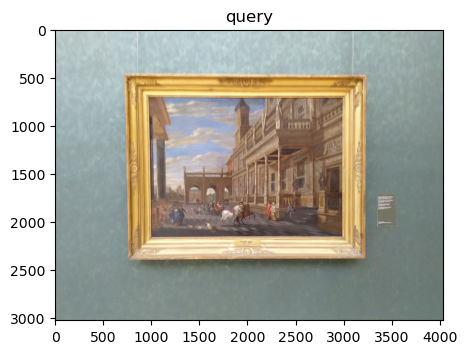

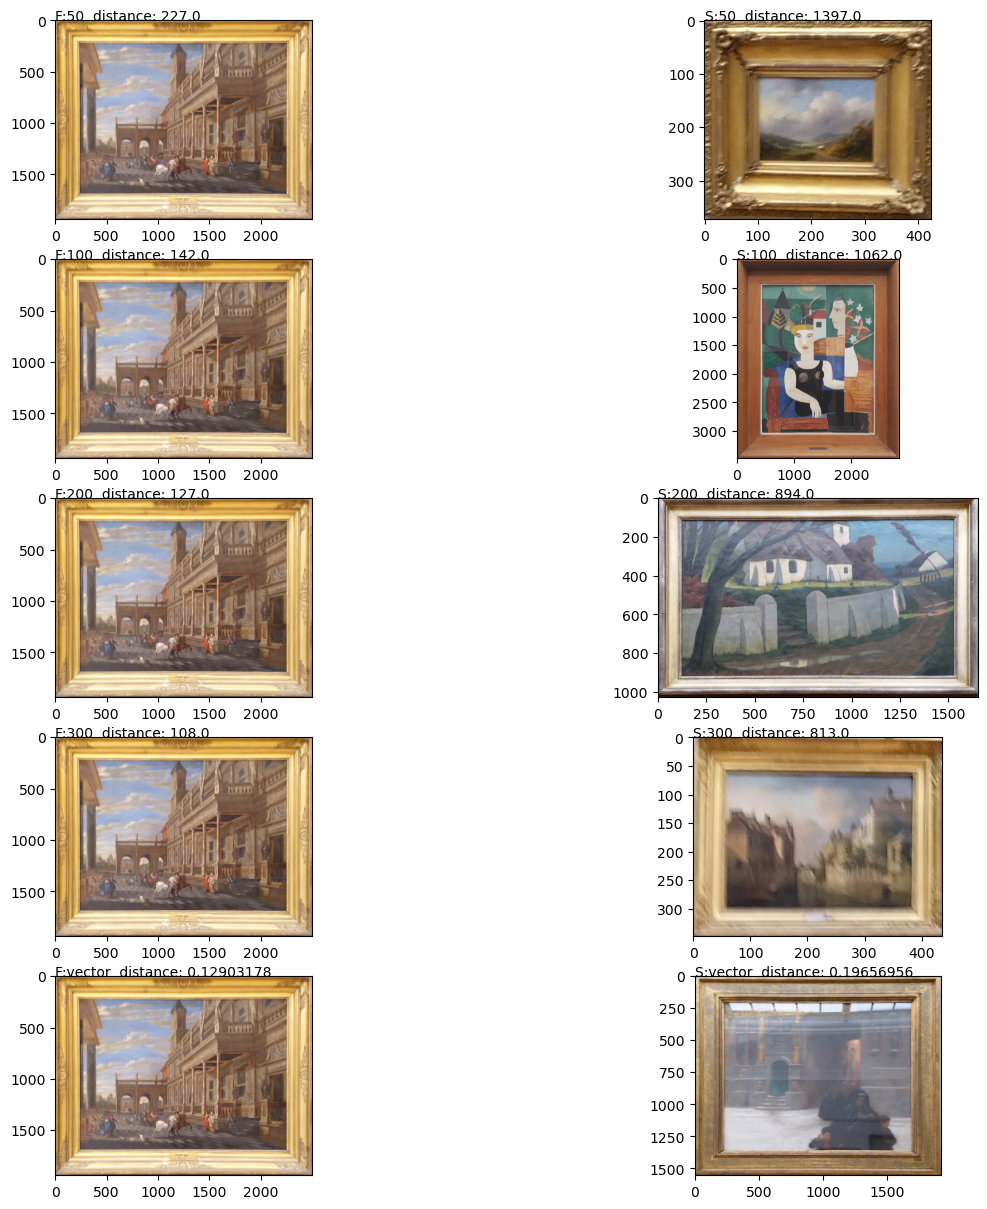

In [84]:
DATABASE_DIR = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/"
TEST_IMAGE_DIR = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Computervisie 2020 Project Database/dataset_pictures_msk"


def load_image(path):
    # img = tf.keras.utils.load_img(path)
    img = tf.keras.preprocessing.image.load_img(path)
    return img


def get_directory(img):
    directory_list = os.listdir(TEST_IMAGE_DIR)

    for file in directory_list:
        directory = os.fsdecode(file)
        sub_dir_path = TEST_IMAGE_DIR + '/' + directory

        if (os.path.isdir(sub_dir_path)):
            for image_name in os.listdir(sub_dir_path):
                filename = os.fsdecode(image_name)
                if filename == img:
                    return sub_dir_path

    
def show_row(df,index):
    global TEST_IMAGE_DIR
    global DATABASE_DIR
    
    directory = get_directory(df.iloc[index].filename)

    image = load_image(directory + "/" + df.iloc[index].filename)
    plt.figure(figsize = (5,5))
    plt.imshow(image)
    plt.title("query")


    f, axarr = plt.subplots(5,2,figsize=(15,15))

    if (len(df.iloc[index].result_50_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_50_features[0])
        axarr[0,0].imshow(image)
        axarr[0,0].text(0, 0, "F:50  distance: " + str(df.iloc[index].distance_50_features[0]))

    if (len(df.iloc[index].second_result_50_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_50_features[0])
        axarr[0,1].imshow(image)
        axarr[0,1].text(0, 0, "S:50  distance: " + str(df.iloc[index].second_distance_50_features[0]))

    if (len(df.iloc[index].result_100_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_100_features[0])
        axarr[1,0].imshow(image)
        axarr[1,0].text(0, 0, "F:100  distance: " + str(df.iloc[index].distance_100_features[0]))

    if (len(df.iloc[index].second_result_100_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_100_features[0])
        axarr[1,1].imshow(image)
        axarr[1,1].text(0, 0, "S:100  distance: " + str(df.iloc[index].second_distance_100_features[0]))

    if (len(df.iloc[index].result_200_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_200_features[0])
        axarr[2,0].imshow(image)
        axarr[2,0].text(0, 0, "F:200  distance: " + str(df.iloc[index].distance_200_features[0]))

    if (len(df.iloc[index].second_result_200_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_200_features[0])
        axarr[2,1].imshow(image)
        axarr[2,1].text(0, 0, "S:200  distance: " + str(df.iloc[index].second_distance_200_features[0]))

    if (len(df.iloc[index].result_300_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_300_features[0])
        axarr[3,0].imshow(image)
        axarr[3,0].text(0, 0, "F:300  distance: " + str(df.iloc[index].distance_300_features[0]))

    if (len(df.iloc[index].second_result_300_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_300_features[0])
        axarr[3,1].imshow(image)
        axarr[3,1].text(0, 0, "S:300  distance: " + str(df.iloc[index].second_distance_300_features[0]))


    if (len(df.iloc[index].result_fvector)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_fvector[0])
        axarr[4,0].imshow(image)
        axarr[4,0].text(0, 0, "F:vector  distance: " + str(df.iloc[index].distance_fvector[0]))

    if (len(df.iloc[index].second_result_fvector)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_fvector[0])
        axarr[4,1].imshow(image)
        axarr[4,1].text(0, 0, "S:vector  distance: " + str(df.iloc[index].second_distance_fvector[0]))



# print(df.iloc[0].filename)
# print(get_directory(df.iloc[0].filename))
show_row(df,2)

# Preprocess

## Filter empty records (bad detection)

In [86]:
print(f"Dataframe rows: {len(df)}")
df = df[df.time_fvector.map(len)  != 0]
print(f"Dataframe rows after filtering: {len(df)}")
df.head()

Dataframe rows: 553
Dataframe rows after filtering: 437


,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
2,2,IMG_20190323_114931.jpg,[zaal_14__IMG_20190323_114931__01.png],[227.0],[zaal_19__IMG_20190323_121411__10.png],[1397.0],[0.057628624],[zaal_14__IMG_20190323_114931__01.png],[142.0],[Zaal_D__20190323_114017__01.png],...,[zaal_14__IMG_20190323_114931__01.png],[108.0],[zaal_19__IMG_20190323_121545__10.png],[813.0],[0.3524604],[zaal_14__IMG_20190323_114931__01.png],[0.12903178],[zaal_S__IMG_20190323_122915__01.png],[0.19656956],[0.1331765]
4,4,IMG_20190323_114924.jpg,[zaal_S__IMG_20190323_122553__07.png],[1417.0],[zaal_19__IMG_20190323_121045__01.png],[1426.0],[0.05746596],[zaal_14__IMG_20190323_114924__01.png],[1059.0],[Zaal_E__20190323_115309__01.png],...,[zaal_14__IMG_20190323_114924__01.png],[661.0],[zaal_15__IMG_20190323_120146__01.png],[844.0],[0.37609386],[zaal_17__IMG_20190323_120545__01.png],[0.32107997],[zaal_15__IMG_20190323_120301__01.png],[0.34231055],[0.07590808]
8,8,IMG_20190323_114917.jpg,[zaal_14__IMG_20190323_114917__01.png],[271.0],[zaal_19__IMG_20190323_121537__12.png],[1458.0],[0.060655],[zaal_14__IMG_20190323_114917__01.png],[182.0],[Zaal_D__20190323_114047__01.png],...,[zaal_14__IMG_20190323_114917__01.png],[121.0],[Zaal_D__20190323_113342__01.png],[883.0],[0.36993635],[zaal_14__IMG_20190323_114917__01.png],[0.07964456],[zaal_14__IMG_20190323_114924__01.png],[0.15992922],[0.07543387]
14,14,IMG_20190323_114601.jpg,[zaal_13__IMG_20190323_114601__01.png],[178.0],[zaal_15__IMG_20190323_115356__01.png],[1322.0],[0.06028821],[zaal_13__IMG_20190323_114601__01.png],[136.0],[zaal_15__IMG_20190323_115356__01.png],...,[zaal_13__IMG_20190323_114601__01.png],[85.0],[Zaal_M__20190323_123455__01.png],[861.0],[0.37919578],[zaal_13__IMG_20190323_114601__01.png],[0.10645366],[zaal_19__IMG_20190323_121245__01.png],[0.16724014],[0.08133484]
16,16,IMG_20190323_114528.jpg,[zaal_13__IMG_20190323_114528__01.png],[307.0],[zaal_19__IMG_20190323_121420__03.png],[1371.0],[0.060505625],[zaal_13__IMG_20190323_114528__01.png],[251.0],[zaal_19__IMG_20190323_121420__03.png],...,[zaal_13__IMG_20190323_114528__01.png],[141.0],[zaal_19__IMG_20190323_121420__09.png],[929.0],[0.3743597],[zaal_13__IMG_20190323_114528__01.png],[0.09250796],[Zaal_M__20190323_123701__01.png],[0.21211547],[0.075523086]


Show failed keypoint matches

In [87]:
df[df.result_50_features.map(len)  == 0]

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
79,79,20190323_123614.jpg,[],[],[],[],[0.052373916],[Zaal_M__20190323_123614__01.png],[240.0],[Zaal_C__20190323_112836__11.png],...,[Zaal_M__20190323_123614__01.png],[168.0],[zaal_2__IMG_20190323_112113__02.png],[692.0],[0.35376576],[Zaal_M__20190323_123614__01.png],[0.24086374],[zaal_V__IMG_20190323_121833__01.png],[0.28992593],[0.07462404]
223,223,20190323_112531.jpg,[],[],[],[],[0.01638575],[],[],[],...,[],[],[],[],[0.044329915],[Zaal_B__20190323_112531__01.png],[0.5915303],[Zaal_C__20190323_112836__10.png],[0.6352927],[0.07349125]
225,225,20190323_112302.jpg,[],[],[],[],[0.0627955],[Zaal_B__20190323_112302__01.png],[228.0],[Zaal_L__20190323_122703__01.png],...,[Zaal_B__20190323_112302__01.png],[175.0],[Zaal_B__20190323_112346__01.png],[692.0],[0.31923229],[Zaal_B__20190323_112346__01.png],[0.32085216],[Zaal_B__20190323_112322__01.png],[0.35806268],[0.08378375]
250,250,20190323_120524.jpg,[],[],[],[],[0.036525793],[zaal_19__IMG_20190323_120852__01.png],[1300.0],[zaal_19__IMG_20190323_121622__10.png],...,[zaal_19__IMG_20190323_121312__02.png],[898.0],[zaal_19__IMG_20190323_121333__02.png],[993.0],[0.26853925],[zaal_S__IMG_20190323_122641__01.png],[0.60323554],[zaal_15__IMG_20190323_115546__01.png],[0.6126693],[0.07111021]
424,424,20190323_112015.jpg,[],[],[],[],[0.049287416],[],[],[],...,[],[],[],[],[0.10058254],[Zaal_C__20190323_113006__05.png],[0.60853493],[Zaal_C__20190323_113006__04.png],[0.6360854],[0.07249104]
434,434,IMG_20190323_122830.jpg,[],[],[],[],[0.001504708],[],[],[],...,[],[],[],[],[0.001723666],[zaal_2__IMG_20190323_112113__01.png],[0.49571615],[zaal_2__IMG_20190323_112200__02.png],[0.6147125],[0.073550835]
520,520,IMG_20190323_120417.jpg,[],[],[],[],[0.017263958],[],[],[],...,[],[],[],[],[0.039438043],[Zaal_C__20190323_113006__03.png],[0.4223783],[zaal_10__IMG_20190323_113904__01.png],[0.4426388],[0.07441908]


## Fetch filename (IMG_... remove prefix)

In [88]:
def clean_filename(filename):
    parts = filename.split("_")
    if(parts[0] == "IMG"):
        filename = ''.join(map(str,parts[1:]))
        parts = filename.split(".")
        filename  = parts[0]
    return filename


df["filename"] = df["filename"].apply(lambda x: clean_filename(x))
df.head()

/var/folders/t3/r_rcxl7n0gg577f3yrnz9gq40000gn/T/ipykernel_33807/2276699682.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filename"] = df["filename"].apply(lambda x: clean_filename(x))


,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
2,2,20190323114931,[zaal_14__IMG_20190323_114931__01.png],[227.0],[zaal_19__IMG_20190323_121411__10.png],[1397.0],[0.057628624],[zaal_14__IMG_20190323_114931__01.png],[142.0],[Zaal_D__20190323_114017__01.png],...,[zaal_14__IMG_20190323_114931__01.png],[108.0],[zaal_19__IMG_20190323_121545__10.png],[813.0],[0.3524604],[zaal_14__IMG_20190323_114931__01.png],[0.12903178],[zaal_S__IMG_20190323_122915__01.png],[0.19656956],[0.1331765]
4,4,20190323114924,[zaal_S__IMG_20190323_122553__07.png],[1417.0],[zaal_19__IMG_20190323_121045__01.png],[1426.0],[0.05746596],[zaal_14__IMG_20190323_114924__01.png],[1059.0],[Zaal_E__20190323_115309__01.png],...,[zaal_14__IMG_20190323_114924__01.png],[661.0],[zaal_15__IMG_20190323_120146__01.png],[844.0],[0.37609386],[zaal_17__IMG_20190323_120545__01.png],[0.32107997],[zaal_15__IMG_20190323_120301__01.png],[0.34231055],[0.07590808]
8,8,20190323114917,[zaal_14__IMG_20190323_114917__01.png],[271.0],[zaal_19__IMG_20190323_121537__12.png],[1458.0],[0.060655],[zaal_14__IMG_20190323_114917__01.png],[182.0],[Zaal_D__20190323_114047__01.png],...,[zaal_14__IMG_20190323_114917__01.png],[121.0],[Zaal_D__20190323_113342__01.png],[883.0],[0.36993635],[zaal_14__IMG_20190323_114917__01.png],[0.07964456],[zaal_14__IMG_20190323_114924__01.png],[0.15992922],[0.07543387]
14,14,20190323114601,[zaal_13__IMG_20190323_114601__01.png],[178.0],[zaal_15__IMG_20190323_115356__01.png],[1322.0],[0.06028821],[zaal_13__IMG_20190323_114601__01.png],[136.0],[zaal_15__IMG_20190323_115356__01.png],...,[zaal_13__IMG_20190323_114601__01.png],[85.0],[Zaal_M__20190323_123455__01.png],[861.0],[0.37919578],[zaal_13__IMG_20190323_114601__01.png],[0.10645366],[zaal_19__IMG_20190323_121245__01.png],[0.16724014],[0.08133484]
16,16,20190323114528,[zaal_13__IMG_20190323_114528__01.png],[307.0],[zaal_19__IMG_20190323_121420__03.png],[1371.0],[0.060505625],[zaal_13__IMG_20190323_114528__01.png],[251.0],[zaal_19__IMG_20190323_121420__03.png],...,[zaal_13__IMG_20190323_114528__01.png],[141.0],[zaal_19__IMG_20190323_121420__09.png],[929.0],[0.3743597],[zaal_13__IMG_20190323_114528__01.png],[0.09250796],[Zaal_M__20190323_123701__01.png],[0.21211547],[0.075523086]


## Replace result arrays

In [89]:
def replace_database_name(array):
    if(len(array) > 0):
        filename = array[0]
        parts = filename.split("__")
        photo = parts[1][4:]
        parts = photo.split("_")
        photo = ''.join(map(str,parts))
        return photo
    return ""

def replace_distance(array):
    if(len(array) > 0):
        return array[0]
    return None

df["result_50_features"] = df["result_50_features"].apply(lambda x: replace_database_name(x))
df["second_result_50_features"] = df["second_result_50_features"].apply(lambda x: replace_database_name(x))
df["result_100_features"] = df["result_100_features"].apply(lambda x: replace_database_name(x))
df["second_result_100_features"] = df["second_result_100_features"].apply(lambda x: replace_database_name(x))
df["result_200_features"] = df["result_200_features"].apply(lambda x: replace_database_name(x))
df["second_result_200_features"] = df["second_result_200_features"].apply(lambda x: replace_database_name(x))
df["result_300_features"] = df["result_300_features"].apply(lambda x: replace_database_name(x))
df["second_result_300_features"] = df["second_result_300_features"].apply(lambda x: replace_database_name(x))
df["result_fvector"] = df["result_fvector"].apply(lambda x: replace_database_name(x))
df["second_result_fvector"] = df["second_result_fvector"].apply(lambda x: replace_database_name(x))


df["distance_50_features"] = df["distance_50_features"].apply(lambda x: replace_distance(x))
df["second_distance_50_features"] = df["second_distance_50_features"].apply(lambda x: replace_distance(x))
df["time_50_features"] = df["time_50_features"].apply(lambda x: replace_distance(x))

df["distance_100_features"] = df["distance_100_features"].apply(lambda x: replace_distance(x))
df["second_distance_100_features"] = df["second_distance_100_features"].apply(lambda x: replace_distance(x))
df["time_100_features"] = df["time_100_features"].apply(lambda x: replace_distance(x))

df["distance_200_features"] = df["distance_200_features"].apply(lambda x: replace_distance(x))
df["second_distance_200_features"] = df["second_distance_200_features"].apply(lambda x: replace_distance(x))
df["time_200_features"] = df["time_200_features"].apply(lambda x: replace_distance(x))

df["distance_300_features"] = df["distance_300_features"].apply(lambda x: replace_distance(x))
df["second_distance_300_features"] = df["second_distance_300_features"].apply(lambda x: replace_distance(x))
df["time_300_features"] = df["time_300_features"].apply(lambda x: replace_distance(x))

df["distance_fvector"] = df["distance_fvector"].apply(lambda x: replace_distance(x))
df["second_distance_fvector"] = df["second_distance_fvector"].apply(lambda x: replace_distance(x))
df["time_fvector"] = df["time_fvector"].apply(lambda x: replace_distance(x))

df.head()


/var/folders/t3/r_rcxl7n0gg577f3yrnz9gq40000gn/T/ipykernel_33807/3387137718.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["result_50_features"] = df["result_50_features"].apply(lambda x: replace_database_name(x))
/var/folders/t3/r_rcxl7n0gg577f3yrnz9gq40000gn/T/ipykernel_33807/3387137718.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["second_result_50_features"] = df["second_result_50_features"].apply(lambda x: replace_database_name(x))
/var/folders/t3/r_rcxl7n0gg577f3yrnz9gq40000gn/T/ipy

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
2,2,20190323114931,20190323114931,227.0,20190323121411,1397.0,0.057629,20190323114931,142.0,0323114017,...,20190323114931,108.0,20190323121545,813.0,0.352460,20190323114931,0.129032,20190323122915,0.196570,0.133177
4,4,20190323114924,20190323122553,1417.0,20190323121045,1426.0,0.057466,20190323114924,1059.0,0323115309,...,20190323114924,661.0,20190323120146,844.0,0.376094,20190323120545,0.321080,20190323120301,0.342311,0.075908
8,8,20190323114917,20190323114917,271.0,20190323121537,1458.0,0.060655,20190323114917,182.0,0323114047,...,20190323114917,121.0,0323113342,883.0,0.369936,20190323114917,0.079645,20190323114924,0.159929,0.075434
14,14,20190323114601,20190323114601,178.0,20190323115356,1322.0,0.060288,20190323114601,136.0,20190323115356,...,20190323114601,85.0,0323123455,861.0,0.379196,20190323114601,0.106454,20190323121245,0.167240,0.081335
16,16,20190323114528,20190323114528,307.0,20190323121420,1371.0,0.060506,20190323114528,251.0,20190323121420,...,20190323114528,141.0,20190323121420,929.0,0.374360,20190323114528,0.092508,0323123701,0.212115,0.075523


# Check right/wrong results

In [90]:

print(f'Total records: {len(df)}')
print(f'50 features right matches: {len(df[df.filename == df.result_50_features])}') 
print(f'100 features right matches: {len(df[df.filename == df.result_100_features])}') 
print(f'200 features right matches: {len(df[df.filename == df.result_200_features])}') 
print(f'300 features right matches: {len(df[df.filename == df.result_300_features])}') 
print(f'Feature vector right matches: {len(df[df.filename == df.result_fvector])}') 


Total records: 437
50 features right matches: 308
100 features right matches: 320
200 features right matches: 321
300 features right matches: 322
Feature vector right matches: 272


In [91]:
total_records = len(df)

print(f'50 features right matches: {len(df[df.filename == df.result_50_features])/total_records*100.0}%') 
print(f'100 features right matches: {len(df[df.filename == df.result_100_features])/total_records*100.0}%') 
print(f'200 features right matches: {len(df[df.filename == df.result_200_features])/total_records*100.0}%') 
print(f'300 features right matches: {len(df[df.filename == df.result_300_features])/total_records*100.0}%') 
print(f'Feature vector right matches: {len(df[df.filename == df.result_fvector])/total_records*100.0}%') 

50 features right matches: 70.48054919908466%
100 features right matches: 73.22654462242562%
200 features right matches: 73.4553775743707%
300 features right matches: 73.68421052631578%
Feature vector right matches: 62.24256292906178%


# Average distance (global)

In [96]:
sub_df = df[df.distance_50_features.isna() == False]
sub_df

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
2,2,20190323114931,20190323114931,227.0,20190323121411,1397.0,0.057629,20190323114931,142.0,0323114017,...,20190323114931,108.0,20190323121545,813.0,0.352460,20190323114931,0.129032,20190323122915,0.196570,0.133177
4,4,20190323114924,20190323122553,1417.0,20190323121045,1426.0,0.057466,20190323114924,1059.0,0323115309,...,20190323114924,661.0,20190323120146,844.0,0.376094,20190323120545,0.321080,20190323120301,0.342311,0.075908
8,8,20190323114917,20190323114917,271.0,20190323121537,1458.0,0.060655,20190323114917,182.0,0323114047,...,20190323114917,121.0,0323113342,883.0,0.369936,20190323114917,0.079645,20190323114924,0.159929,0.075434
14,14,20190323114601,20190323114601,178.0,20190323115356,1322.0,0.060288,20190323114601,136.0,20190323115356,...,20190323114601,85.0,0323123455,861.0,0.379196,20190323114601,0.106454,20190323121245,0.167240,0.081335
16,16,20190323114528,20190323114528,307.0,20190323121420,1371.0,0.060506,20190323114528,251.0,20190323121420,...,20190323114528,141.0,20190323121420,929.0,0.374360,20190323114528,0.092508,0323123701,0.212115,0.075523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,548,20190323112956,0323113850,1489.0,20190323120524,1506.0,0.071717,20190323112956,817.0,20190323113257,...,20190323112956,239.0,0323112346,868.0,0.368675,20190323121537,0.423629,20190323121457,0.426048,0.077069
549,549,20190323112910,20190323112910,276.0,20190323121411,1314.0,0.062956,20190323112910,212.0,20190323111804,...,20190323112910,168.0,20190323121545,878.0,0.370056,20190323112910,0.124584,0323123701,0.250789,0.086855
550,550,20190323112904,20190323112904,246.0,20190323122939,1383.0,0.059426,20190323112904,162.0,20190323113829,...,20190323112904,128.0,0323121834,939.0,0.369308,20190323112904,0.121589,20190323121216,0.204309,0.077393
551,551,20190323112938,20190323112938,224.0,20190323123029,1336.0,0.060370,20190323112938,198.0,20190323121420,...,20190323112938,136.0,0323112409,900.0,0.358415,20190323112938,0.102653,20190323112147,0.221958,0.079194


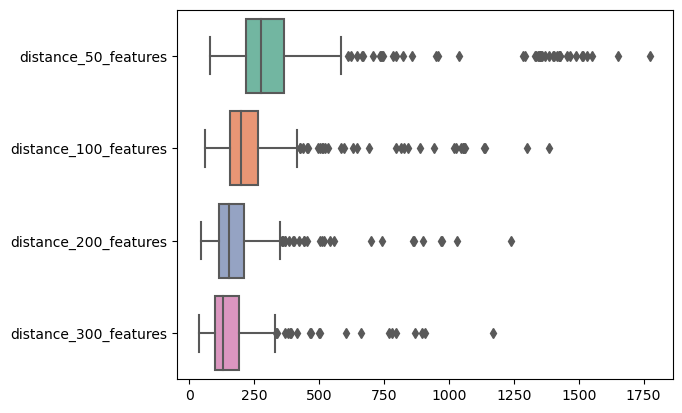

In [97]:
boxplot_columns =  df[["distance_50_features","distance_100_features","distance_200_features","distance_300_features"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

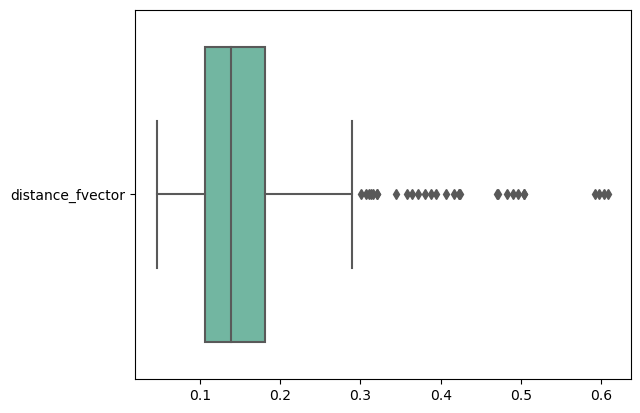

In [98]:
boxplot_columns =  df[["distance_fvector"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

In [99]:
print(f'50 features distance mean: {df.distance_50_features.mean()}') 
print(f'100 features distance mean: {df.distance_100_features.mean()}') 
print(f'200 features distance mean: {df.distance_200_features.mean()}') 
print(f'300 features distance mean: {df.distance_300_features.mean()}') 
print(f'Feature vector distance mean: {df.distance_fvector.mean()}') 

50 features distance mean: 374.9813953488372
100 features distance mean: 247.87759815242495
200 features distance mean: 187.71362586605082
300 features distance mean: 164.63741339491918
Feature vector distance mean: 0.15946702659130096


#  Average distance (right matches)

Restricted 50 features!

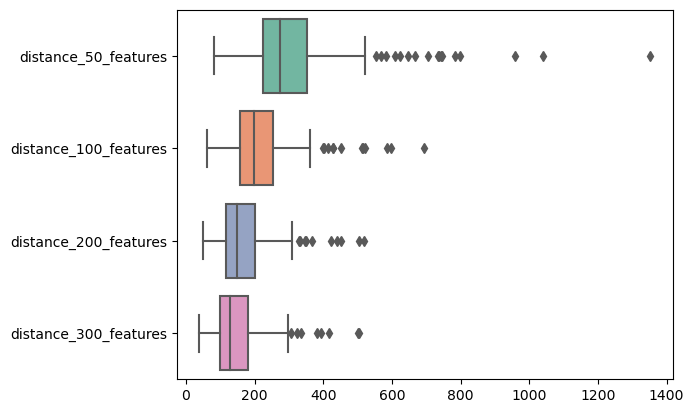

In [100]:
sub_df = df[df.filename == df.result_50_features]
boxplot_columns =  sub_df[["distance_50_features","distance_100_features","distance_200_features","distance_300_features"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

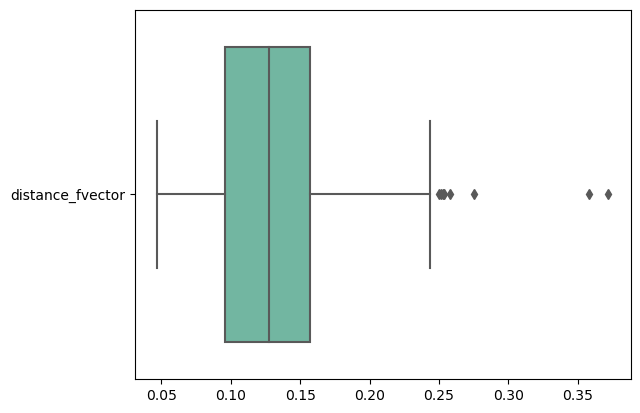

In [101]:
sub_df = df[df.filename == df.result_fvector]
boxplot_columns =  sub_df[["distance_fvector"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

In [102]:
sub_df = df[df.filename == df.result_50_features]
print(f'50 features distance mean: {sub_df.distance_50_features.mean()}') 
print(f'100 features distance mean: {sub_df.distance_100_features.mean()}') 
print(f'200 features distance mean: {sub_df.distance_200_features.mean()}') 
print(f'300 features distance mean: {sub_df.distance_300_features.mean()}') 
sub_df = df[df.filename == df.result_fvector]
print(f'Feature vector distance mean: {sub_df.distance_fvector.mean()}') 

50 features distance mean: 310.44805194805195
100 features distance mean: 215.75324675324674
200 features distance mean: 166.59415584415584
300 features distance mean: 146.1818181818182
Feature vector distance mean: 0.13363754749298096


# Average distance wrong matches

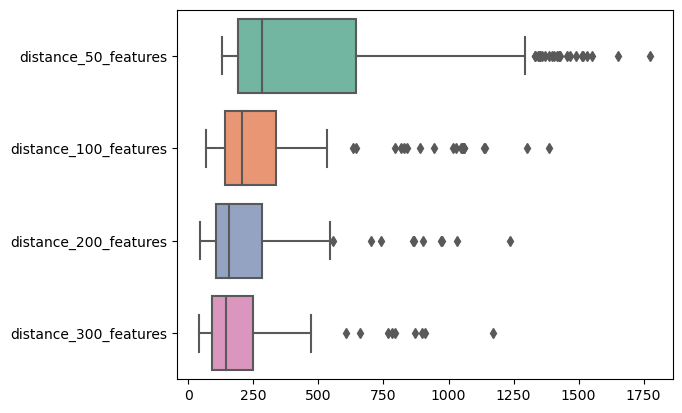

In [103]:
sub_df = df[df.filename != df.result_50_features]
boxplot_columns =  sub_df[["distance_50_features","distance_100_features","distance_200_features","distance_300_features"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

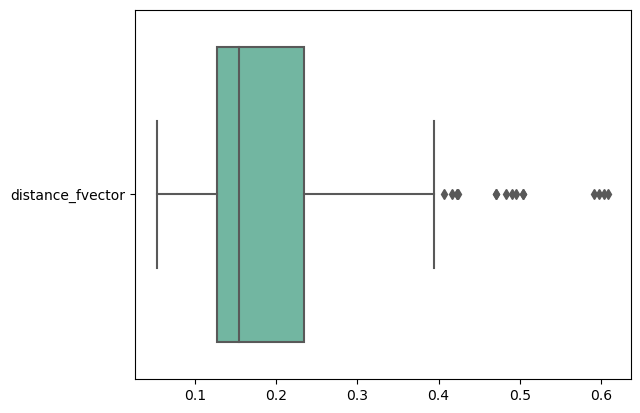

In [104]:
sub_df = df[df.filename != df.result_fvector]
boxplot_columns =  sub_df[["distance_fvector"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

In [105]:
sub_df = df[df.filename != df.result_50_features]
print(f'50 features distance mean: {sub_df.distance_50_features.mean()}') 
print(f'100 features distance mean: {sub_df.distance_100_features.mean()}') 
print(f'200 features distance mean: {sub_df.distance_200_features.mean()}') 
print(f'300 features distance mean: {sub_df.distance_300_features.mean()}') 
sub_df = df[df.filename != df.result_fvector]
print(f'Feature vector distance mean: {sub_df.distance_fvector.mean()}') 

50 features distance mean: 537.9016393442623
100 features distance mean: 327.032
200 features distance mean: 239.752
300 features distance mean: 210.112
Feature vector distance mean: 0.20204657316207886


# Distance between first and second result
## Setup

In [106]:
df["diffrence_50"] =  df["second_distance_50_features"] - df["distance_50_features"]
df["diffrence_100"] =  df["second_distance_100_features"] - df["distance_100_features"]
df["diffrence_200"] =  df["second_distance_200_features"] - df["distance_200_features"]
df["diffrence_300"] =  df["second_distance_300_features"] - df["distance_300_features"]
df["diffrence_fvector"] =  df["second_distance_fvector"] - df["distance_fvector"]
df

/var/folders/t3/r_rcxl7n0gg577f3yrnz9gq40000gn/T/ipykernel_33807/596061683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diffrence_50"] =  df["second_distance_50_features"] - df["distance_50_features"]
/var/folders/t3/r_rcxl7n0gg577f3yrnz9gq40000gn/T/ipykernel_33807/596061683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diffrence_100"] =  df["second_distance_100_features"] - df["distance_100_features"]
/var/folders/t3/r_rcxl7n0gg577f3yrnz9gq40000gn/T/ipykernel_33807/596061683.py:3: Sett

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector,diffrence_50,diffrence_100,diffrence_200,diffrence_300,diffrence_fvector
2,2,20190323114931,20190323114931,227.0,20190323121411,1397.0,0.057629,20190323114931,142.0,0323114017,...,20190323114931,0.129032,20190323122915,0.196570,0.133177,1170.0,920.0,767.0,705.0,0.067538
4,4,20190323114924,20190323122553,1417.0,20190323121045,1426.0,0.057466,20190323114924,1059.0,0323115309,...,20190323120545,0.321080,20190323120301,0.342311,0.075908,9.0,9.0,229.0,183.0,0.021231
8,8,20190323114917,20190323114917,271.0,20190323121537,1458.0,0.060655,20190323114917,182.0,0323114047,...,20190323114917,0.079645,20190323114924,0.159929,0.075434,1187.0,1005.0,820.0,762.0,0.080285
14,14,20190323114601,20190323114601,178.0,20190323115356,1322.0,0.060288,20190323114601,136.0,20190323115356,...,20190323114601,0.106454,20190323121245,0.167240,0.081335,1144.0,933.0,841.0,776.0,0.060786
16,16,20190323114528,20190323114528,307.0,20190323121420,1371.0,0.060506,20190323114528,251.0,20190323121420,...,20190323114528,0.092508,0323123701,0.212115,0.075523,1064.0,900.0,831.0,788.0,0.119608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,548,20190323112956,0323113850,1489.0,20190323120524,1506.0,0.071717,20190323112956,817.0,20190323113257,...,20190323121537,0.423629,20190323121457,0.426048,0.077069,17.0,350.0,585.0,629.0,0.002419
549,549,20190323112910,20190323112910,276.0,20190323121411,1314.0,0.062956,20190323112910,212.0,20190323111804,...,20190323112910,0.124584,0323123701,0.250789,0.086855,1038.0,900.0,775.0,710.0,0.126205
550,550,20190323112904,20190323112904,246.0,20190323122939,1383.0,0.059426,20190323112904,162.0,20190323113829,...,20190323112904,0.121589,20190323121216,0.204309,0.077393,1137.0,984.0,846.0,811.0,0.082720
551,551,20190323112938,20190323112938,224.0,20190323123029,1336.0,0.060370,20190323112938,198.0,20190323121420,...,20190323112938,0.102653,20190323112147,0.221958,0.079194,1112.0,940.0,805.0,764.0,0.119305


## Global

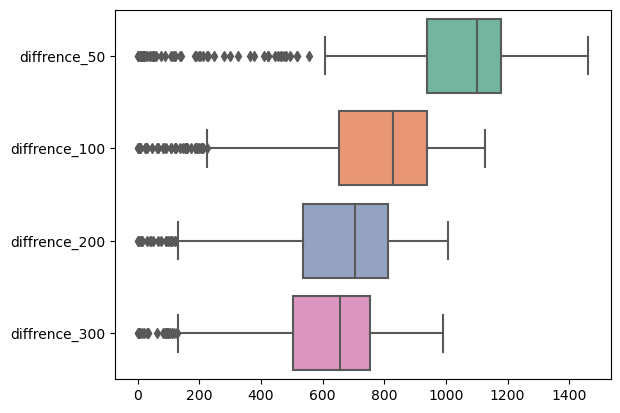

In [107]:
boxplot_columns =  df[["diffrence_50","diffrence_100","diffrence_200","diffrence_300"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

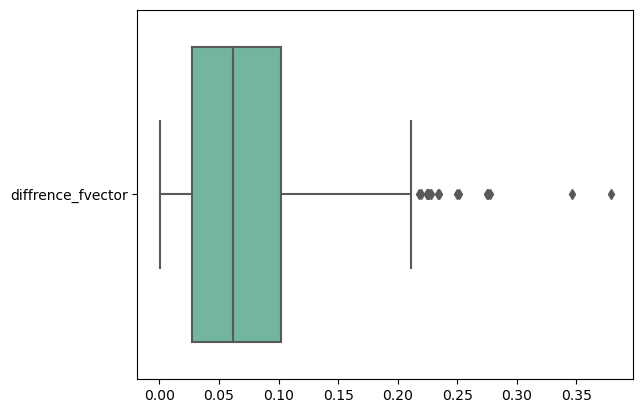

In [108]:
boxplot_columns =  df[["diffrence_fvector"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

## Right matches

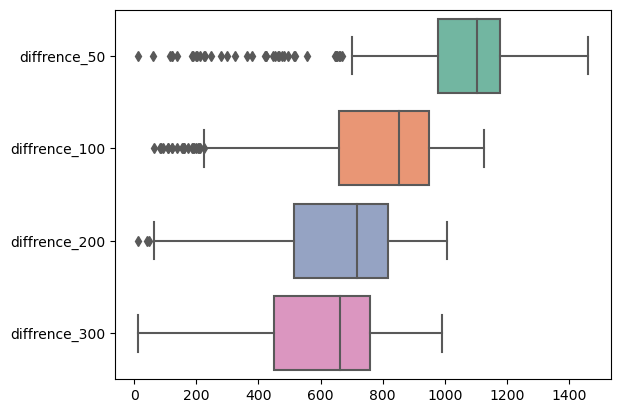

In [109]:
sub_df = df[df.filename == df.result_50_features]
boxplot_columns =  sub_df[["diffrence_50","diffrence_100","diffrence_200","diffrence_300"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

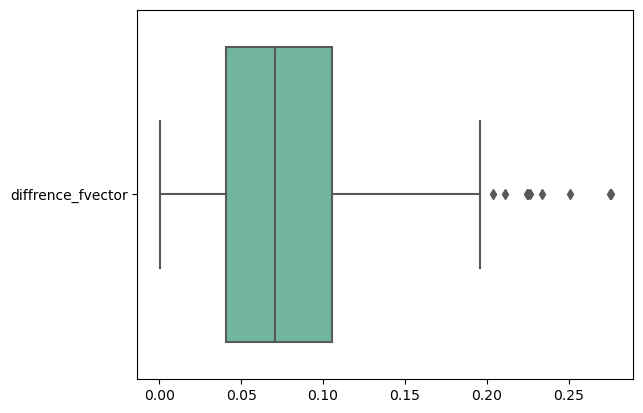

In [119]:
sub_df = df[df.filename == df.result_fvector]
boxplot_columns =  sub_df[["diffrence_fvector"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

## Wrong matches

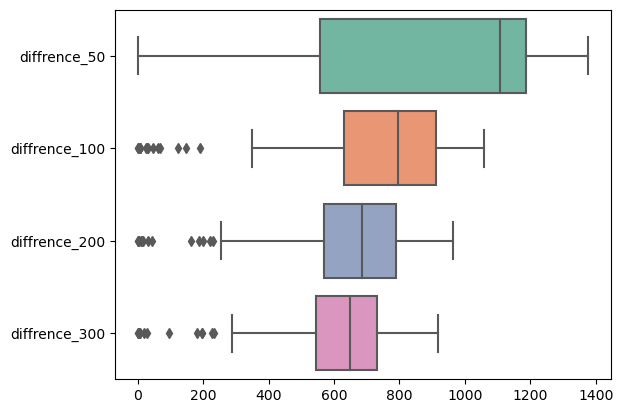

In [111]:
sub_df = df[df.filename != df.result_50_features]
boxplot_columns =  sub_df[["diffrence_50","diffrence_100","diffrence_200","diffrence_300"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

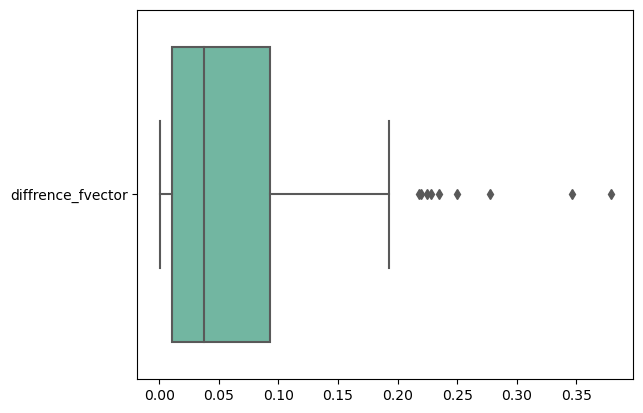

In [112]:
sub_df = df[df.filename != df.result_fvector]
boxplot_columns =  sub_df[["diffrence_fvector"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

# Time

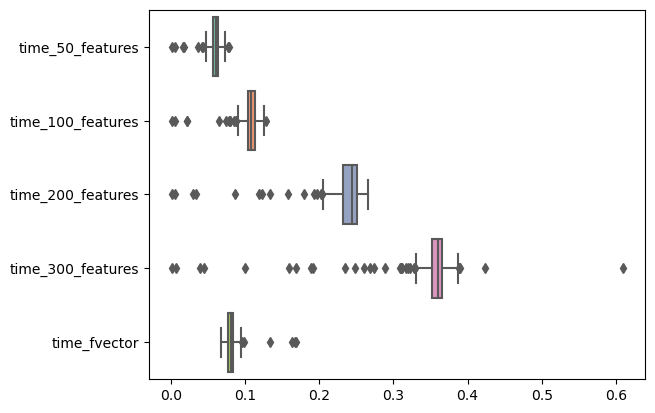

In [114]:
boxplot_columns =  df[["time_50_features","time_100_features","time_200_features","time_300_features","time_fvector"]]
ax = sns.boxplot(data=boxplot_columns, orient="h", palette="Set2")

In [120]:
print(f"Average: {df.time_50_features.mean()}")
print(f"Average: {df.time_100_features.mean()}")
print(f"Average: {df.time_200_features.mean()}")
print(f"Average: {df.time_300_features.mean()}")
print(f"Average: {df.time_fvector.mean()}")

Average: 0.060039591044187546
Average: 0.1071176528930664
Average: 0.23807528614997864
Average: 0.352964848279953
Average: 0.08152622729539871


# Database

In [8]:
db = pd.read_csv("/home/server/Documents/Github/computervisie-group8/src/data/keypoints.csv", ",")
# db['descriptors'] = db['descriptors'].apply(lambda x: convert_descriptors(x))
# db['keypoints'] = db['keypoints'].apply(lambda x: convert_keypoints(x))
#db['fvector'] = db['fvector'].apply(lambda x: convert_fvector(x))
db

/home/server/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,keypoints,descriptors,room,photo,painting_number,fvector
0,0,zaal_12__IMG_20190323_114238__01.png,"[[[274.0, 155.0], 31.0, 304.9578552246094, 0.0...","[[164, 224, 156, 155, 205, 157, 225, 136, 206,...",zaal_12,20190323_114238,1,"[1.5487326383590698, 3.1270999908447266, 0.0, ..."
1,1,Zaal_A__20190323_111857__01.png,"[[[288.0, 530.0], 31.0, 0.42852503061294556, 3...","[[240, 37, 74, 236, 61, 79, 66, 104, 5, 172, 2...",Zaal_A,0323_111857,1,"[1.8000414371490479, 1.1441154479980469, 2.295..."
2,2,zaal_15__IMG_20190323_115648__01.png,"[[[372.0, 510.0], 31.0, 146.66563415527344, 0....","[[165, 227, 45, 41, 172, 15, 199, 185, 66, 124...",zaal_15,20190323_115648,1,"[0.0, 0.0, 0.42124831676483154, 0.0, 2.2845273..."
3,3,zaal_11__IMG_20190323_114030__01.png,"[[[221.0, 41.0], 31.0, 257.9009094238281, 0.00...","[[57, 33, 112, 65, 119, 27, 250, 89, 105, 160,...",zaal_11,20190323_114030,1,"[2.528398036956787, 1.7421743869781494, 0.0, 0..."
4,4,zaal_15__IMG_20190323_120008__01.png,"[[[634.0, 432.0], 31.0, 178.6969757080078, 0.0...","[[66, 32, 134, 141, 76, 131, 168, 73, 190, 176...",zaal_15,20190323_120008,1,"[0.0, 3.387141227722168, 0.0, 0.0, 0.704207062..."
...,...,...,...,...,...,...,...,...
796,796,Zaal_K__20190323_122032__01.png,"[[[321.0, 327.0], 31.0, 291.553466796875, 4.64...","[[130, 148, 39, 155, 213, 247, 184, 103, 31, 2...",Zaal_K,0323_122032,1,"[0.0, 2.036345958709717, 1.0077383518218994, 0..."
797,797,zaal_19__IMG_20190323_121118__01.png,"[[[209.0, 565.0], 31.0, 90.82535552978516, 7.1...","[[213, 140, 135, 31, 155, 98, 6, 175, 118, 243...",zaal_19,20190323_121118,1,"[2.7316460609436035, 3.4137418270111084, 0.0, ..."
798,798,zaal_S__IMG_20190323_122759__01.png,"[[[213.0, 237.0], 31.0, 241.41717529296875, 1....","[[112, 89, 39, 37, 36, 78, 101, 48, 225, 218, ...",zaal_S,20190323_122759,1,"[0.7798616290092468, 2.2594056129455566, 0.179..."
799,799,Zaal_I__20190323_121200__01.png,"[[[203.0, 284.0], 31.0, 140.62030029296875, 0....","[[121, 1, 35, 237, 4, 78, 71, 49, 97, 128, 238...",Zaal_I,0323_121200,1,"[0.5342573523521423, 2.423213243484497, 0.9242..."


In [94]:
db['fvector'].head()

0    [[0.025319321], [0.19909637], [1.0211221], [1....
1    [[0.0], [0.2957968], [0.75874186], [1.9020355]...
2    [[0.05815658], [0.13274843], [1.0250067], [2.2...
3    [[0.033386417], [0.066825934], [1.0996912], [2...
4    [[0.01642335], [0.20404491], [0.7372967], [1.6...
Name: fvector, dtype: object

In [100]:
from scipy.spatial import distance



#similar_idx_cosine = [ distance.cosine(vectors, feat) for feat in db['fvector'] ]
similar_idx_cosine = [ distance.euclidean(vectors, feat) for feat in db['fvector'] ]

In [101]:
idx_closest = sorted(range(len(similar_idx_cosine)), key=lambda k: similar_idx_cosine[k])[1:6]

In [102]:
#print(idx_closest)
for name in db.iloc[idx_closest].id:
    print(name)

zaal_19__IMG_20190323_121537__06.png
zaal_19__IMG_20190323_121537__07.png
zaal_19__IMG_20190323_121523__03.png
zaal_19__IMG_20190323_121447__04.png
zaal_19__IMG_20190323_121622__05.png


In [120]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt

2022-05-17 15:40:57.906378: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

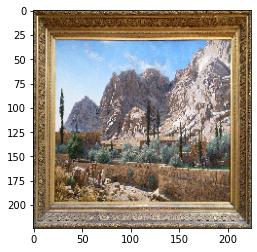

In [121]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()


def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/zaal_19__IMG_20190323_121148__01.png")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [122]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [124]:
import pickle

images_path = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database"
image_extensions = ['.jpg', '.png', '.jpeg']

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
print(f"{len(images)} images to analyze")

features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        print(f"Analyzing image {i} / {len(images)}...")
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0] # (1,4096)
    features.append(feat)

with open("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/features_similar_images.txt", "wb") as fp:
  pickle.dump(features, fp)

print('Finished extracting features for %d images' % len(images))

801 images to analyze
Analyzing image 0 / 801...
Analyzing image 500 / 801...
Finished extracting features for 801 images


In [140]:
with open("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/features_similar_images.txt", "rb") as fp:   # Unpickling
  features = pickle.load(fp)

In [126]:
# from sklearn.decomposition import PCA
# features = np.array(features)

# pca = PCA()
# data_reduced = pca.fit_transform(features)

# pca = PCA(n_components=650)
# pca.fit(features)

# pca_features = pca.transform(features)

14
613
187
314
520
333


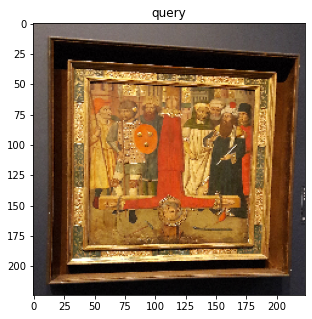

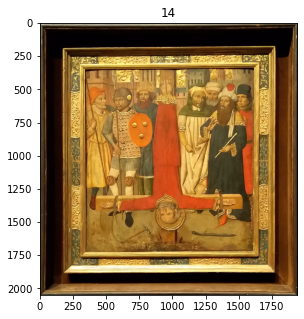

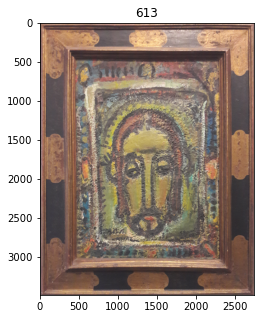

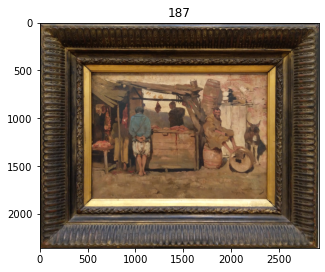

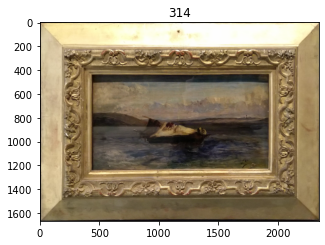

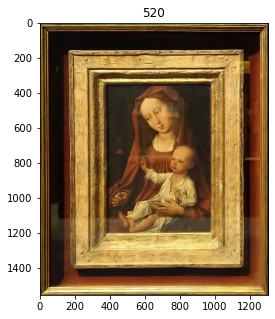

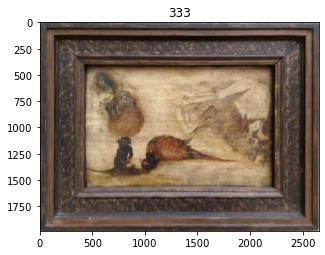

In [179]:
# grab a random query image


#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/zaal_19__IMG_20190323_121148__01.png");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_1__IMG_20190323_111717__01.png");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_V__IMG_20190323_121823__01.png");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");


#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_110345.jpg");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");
img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg");





vectors = feat_extractor.predict(x)[0] # (1,4096)Ò

# pca_features = pca.transform(feat)


similar_idx_cosine = [ distance.cosine(vectors, feat) for feat in features ]

idx_closest = sorted(range(len(similar_idx_cosine)), key=lambda k: similar_idx_cosine[k])[0:6]

# for name in db.iloc[idx_closest].id:
#     print(name)

plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("query")

for i in idx_closest:
    print(i)
    img = image.load_img(images[i])
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(str(i))


In [26]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

class CustomResNet():
    def __init__(self):
        self.pretrained_model = VGG16(weights='imagenet', include_top=True)
        self.model = Model(inputs=self.pretrained_model.input, outputs=self.pretrained_model.get_layer("fc2").output)
    
    def get_feature_vector(self, img_path):
        # Reference

        img, x = self.load_image(img_path);
        feat = self.model.predict(x)[0]

        return feat


    def cosine_match(self,img,df):
        img_array = self.preprocess_convert(img)
        vectors = self.model.predict(img_array)[0]

        similar_idx_cosine = [ distance.cosine(vectors, feat) for feat in df["fvector"]]
        idx_closest = sorted(range(len(similar_idx_cosine)), key=lambda k: similar_idx_cosine[k])[0:6]

        for i in idx_closest:
            print(i)
        
        return idx_closest

    def load_image(self, path):
        img = image.load_img(path, target_size=self.model.input_shape[1:3])
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return img, x

    def preprocess_convert(self, img):
        img = image.smart_resize(img, self.model.input_shape[1:3])
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return x        
        

In [174]:

import json

DIRECTORY = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database"
directory_list = os.listdir(DIRECTORY)


featureMatcher = CustomResNet()
result = []


for file in directory_list:
    filename = os.fsdecode(file)
    img_path = DIRECTORY + "/" + filename
    print(img_path)

    # vector = featureMatcher.get_feature_vector(img_path)
    # print(vector)

    result.append({
        'id':filename,
        'fvector': json.dumps(featureMatcher.get_feature_vector(img_path).tolist())
    })

/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_19__IMG_20190323_121622__09.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_S__IMG_20190323_122944__04.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_19__IMG_20190323_121523__04.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_19__IMG_20190323_121523__10.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_S__IMG_20190323_122748__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_15__IMG_20190323_115551__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_9__IMG_20190323_113745__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/Zaal_A__20190323_111313__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_18__IMG_20190323_120719__01.png


In [175]:
df = pd.DataFrame(result)
df.head()

,id,fvector
0,zaal_19__IMG_20190323_121622__09.png,"[0.35244137048721313, 0.14393076300621033, 0.0..."
1,zaal_S__IMG_20190323_122944__04.png,"[3.1343345642089844, 3.21919322013855, 0.0, 0...."
2,zaal_19__IMG_20190323_121523__04.png,"[7.578836917877197, 3.3183648586273193, 0.3332..."
3,zaal_19__IMG_20190323_121523__10.png,"[0.0, 0.0, 0.0, 0.0, 4.049309253692627, 0.0, 0..."
4,zaal_S__IMG_20190323_122748__01.png,"[1.7430344820022583, 1.0830790996551514, 0.254..."


In [4]:
df = pd.read_csv("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/keypoints.csv")
df.head()

,Unnamed: 0,id,keypoints,descriptors,room,photo,painting_number,fvector
0,0,zaal_19__IMG_20190323_121622__09.png,"[[[755.0, 95.0], 31.0, 279.59832763671875, 0.0...","[[109, 129, 0, 203, 245, 189, 106, 186, 79, 81...",zaal_19,20190323_121622,9,"[0.35244137048721313, 0.14393076300621033, 0.0..."
1,1,zaal_S__IMG_20190323_122944__04.png,"[[[754.0, 311.0], 31.0, 165.23532104492188, 0....","[[169, 250, 63, 26, 105, 95, 19, 228, 249, 95,...",zaal_S,20190323_122944,4,"[3.1343345642089844, 3.21919322013855, 0.0, 0...."
2,2,zaal_19__IMG_20190323_121523__04.png,"[[[72.0, 720.0], 31.0, 313.84197998046875, 0.0...","[[168, 189, 121, 97, 244, 205, 113, 87, 115, 4...",zaal_19,20190323_121523,4,"[7.578836917877197, 3.3183648586273193, 0.3332..."
3,3,zaal_19__IMG_20190323_121523__10.png,"[[[768.0, 31.0], 31.0, 357.64996337890625, 0.0...","[[185, 91, 110, 237, 4, 14, 231, 117, 84, 76, ...",zaal_19,20190323_121523,10,"[0.0, 0.0, 0.0, 0.0, 4.049309253692627, 0.0, 0..."
4,4,zaal_S__IMG_20190323_122748__01.png,"[[[221.0, 395.0], 31.0, 46.401771545410156, 0....","[[42, 190, 102, 152, 255, 177, 184, 199, 159, ...",zaal_S,20190323_122748,1,"[1.7430344820022583, 1.0830790996551514, 0.254..."


In [10]:
def convert_fvector(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.float64)
    return descriptors


df['fvector'] = df['fvector'].apply(lambda x: convert_fvector(x))    

In [11]:
df.head()

,Unnamed: 0,id,keypoints,descriptors,room,photo,painting_number,fvector
0,0,zaal_19__IMG_20190323_121622__09.png,"[[[755.0, 95.0], 31.0, 279.59832763671875, 0.0...","[[109, 129, 0, 203, 245, 189, 106, 186, 79, 81...",zaal_19,20190323_121622,9,"[[0.352441370487213], [0.14393076300621002], [..."
1,1,zaal_S__IMG_20190323_122944__04.png,"[[[754.0, 311.0], 31.0, 165.23532104492188, 0....","[[169, 250, 63, 26, 105, 95, 19, 228, 249, 95,...",zaal_S,20190323_122944,4,"[[3.134334564208984], [3.21919322013855], [0.0..."
2,2,zaal_19__IMG_20190323_121523__04.png,"[[[72.0, 720.0], 31.0, 313.84197998046875, 0.0...","[[168, 189, 121, 97, 244, 205, 113, 87, 115, 4...",zaal_19,20190323_121523,4,"[[7.578836917877197], [3.318364858627319], [0...."
3,3,zaal_19__IMG_20190323_121523__10.png,"[[[768.0, 31.0], 31.0, 357.64996337890625, 0.0...","[[185, 91, 110, 237, 4, 14, 231, 117, 84, 76, ...",zaal_19,20190323_121523,10,"[[0.0], [0.0], [0.0], [0.0], [4.04930925369262..."
4,4,zaal_S__IMG_20190323_122748__01.png,"[[[221.0, 395.0], 31.0, 46.401771545410156, 0....","[[42, 190, 102, 152, 255, 177, 184, 199, 159, ...",zaal_S,20190323_122748,1,"[[1.743034482002258], [1.083079099655151], [0...."


In [12]:
# img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg");


def preprocess_convert(img):
    img = image.smart_resize(img, featureMatcher.model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x        
        

featureMatcher = CustomResNet()

img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg")

#preprocess_convert(img)

featureMatcher.cosine_match(img,df)

14
733
187
613
726
322


261
344
707
7
720
674


Text(0.5, 1.0, 'result')

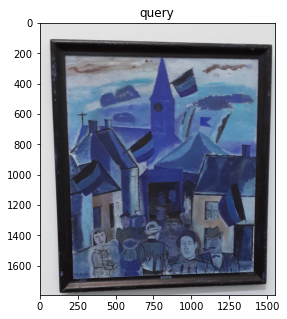

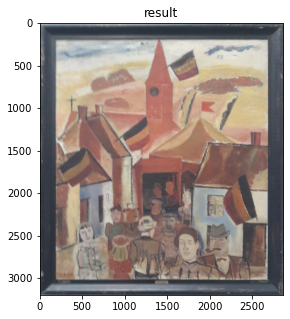

In [29]:

DIRECTORY = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database"
directory_list = os.listdir(DIRECTORY)



#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/zaal_19__IMG_20190323_121148__01.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_1__IMG_20190323_111717__01.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_V__IMG_20190323_121823__01.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");


img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_110345.jpg");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg");

#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg")

featureMatcher = CustomResNet()
sim_indexes = featureMatcher.cosine_match(img,df)

plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("query")

img_path = os.path.join(DIRECTORY, str(df.iloc[sim_indexes[0]].id))
img = image.load_img(img_path)


plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("result")